# Praca domowa 2

## Jakub Bondyra

W tej pracy domowej obiektem mojego zainteresowania były dane dotyczące ofiar wojny domowej w Syrii, trwającej od 2011 roku do chwili obecnej. Syryjskie Obserwatorium Praw Człowieka na swojej stronie niemalże codziennie raportuje o liczbie ludzi zabitych w zeszłym dniu. W tym celu, spisałem (ręcznie) liczby zabitych z ostatnich czterdziestu dni (okres od 1 września do 9 października). W tym dokumencie na samym początku koryguję dane i wprowadzam kilka pomocniczych atrybutów, a następnie wizualizuję wyniki na stosownym wykresie. Dane zaczerpnąłem ze strony http://www.syriahr.com/en/?cat=44.

In [6]:
syria = read.table("syria.txt",sep=" ",header=TRUE)

Wygląd danych

In [7]:
syria

deaths,regime,civilians,day,month
88,14,10,9,10
98,43,36,8,10
91,37,10,7,10
132,41,22,6,10
159,41,56,5,10
77,4,65,4,10
168,33,30,3,10
111,49,25,2,10
155,55,40,1,10
56,9,35,30,9


- Atrybuty *day*, *month* odpowiadają za datę
- Atrybut *deaths* jest liczbą udokumentowanych ofiar poległych w danym dniu
- Atrybut *regime* jest liczbą udokumentowanych ofiar wojsk rządowych ("reżimowych"), poległych w danym dniu
- Atrybut *civilians* odpowiada za liczbę zabitych cywili.

W dniach 7, 8, 15, 19 i 22 września nie było stosownych raportów, zatem estymuję wartości w tych dniach poprzez zastosowanie średnich.

In [ ]:
library(dplyr)

In [9]:
death_mean = syria %>% filter(month==9) %>% select (deaths) %>% unlist %>% mean %>% as.integer
civ_mean = syria %>% filter(month==9) %>% select (civilians) %>% unlist %>%  mean %>% as.integer
reg_mean = syria %>% filter(month==9) %>% select (regime) %>% unlist %>% mean %>% as.integer

In [10]:
#uzupełnianie pustych miejsc
syria$deaths[syria$deaths==-1] = death_mean
syria$civilians[syria$civilians==-1] = civ_mean
syria$regime[syria$regime==-1] = reg_mean

Na wykresie naniesiona jest również średnia dzienna liczba zgonów podczas wojny (źródło: http://www.syriahr.com/en/?p=70012)

In [11]:
deaths_overall = 331765
days_overall = 2315
death_overall_mean = as.integer(deaths_overall/days_overall)

In [12]:
#tyle osób codziennie ginie w wojnie
death_overall_mean

[1] 143

In [13]:
library(ggplot2)

Daty na oś OX

In [14]:
default_labels = c("01/09","08/09","15/09","23/09","30/09","09/10")
default_breaks = c(271,278,285,293,300,309) #wartości id

Funkcja pomocnicza

In [15]:
date_to_id = function (month,day){
    return (month*30+day) #uzyskanie id z daty i miesiąca
}

Wprowadzam atrybut *other* - czyli liczbę zabitych osób nieprzynależących do wojsk rządowych ani cywilów. Chodzi tutaj o bojowników ISIS, żołnierzy rosyjskich, rebeliantów i Kurdów.

In [16]:
syria$other = syria$deaths-syria$civilians-syria$regime

Wprowadzenie unikalnych ID na oś OX - do wizualizacji

In [17]:
syria$id_plot = date_to_id(syria$month,syria$day) #uzyskanie id dla ramki

Rozwijanie ramki, by móc stworzyć stosownego barplota

In [74]:
library(reshape2)
syriam = melt(syria[,c("regime","civilians","other","id_plot")],id="id_plot")

In [65]:
head(syriam)

id_plot,variable,value
309,regime,14
308,regime,43
307,regime,37
306,regime,41
305,regime,41
304,regime,4


Estymacje w dniach 7, 8, 15, 19 i 22 września będę chciał zaznaczyć innymi kolorami, zatem muszę zmienić nazwy niektórych wartości zmiennej variable.

In [75]:
syriam$tmpid = 1:nrow(syriam)

In [76]:
head(syriam)

id_plot,variable,value,tmpid
309,regime,14,1
308,regime,43,2
307,regime,37,3
306,regime,41,4
305,regime,41,5
304,regime,4,6


In [77]:
levels(syriam$variable) = c("regime","civilians","other","regime_est","civilians_est","other_est")

In [78]:
affected_id_reg = unlist(syriam %>% filter(id_plot %in% c(277,278,285,289,292)) 
                         %>% filter(variable=="regime") %>% select(tmpid))
affected_id_civ = unlist(syriam %>% filter(id_plot %in% c(277,278,285,289,292)) 
                         %>% filter(variable=="civilians") %>% select(tmpid))
affected_id_oth = unlist(syriam %>% filter(id_plot %in% c(277,278,285,289,292)) 
                         %>% filter(variable=="other") %>% select(tmpid))

syriam[affected_id_reg,2] = rep("regime_est",length(affected_id_reg))
syriam[affected_id_civ,2] = rep("civilians_est",length(affected_id_reg))
syriam[affected_id_oth,2] = rep("other_est",length(affected_id_reg))

## Wizualizacja

In [79]:
library(ggthemes)

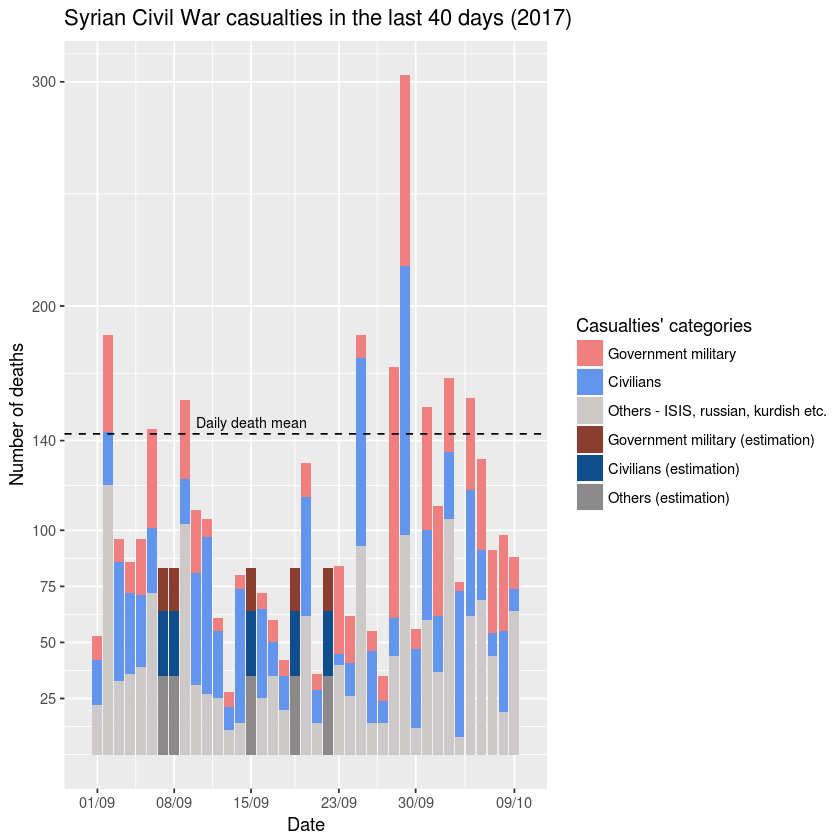

In [87]:
ggplot(data=syriam,aes(id_plot,value,fill=variable)) +
scale_fill_manual(labels=c("Government military","Civilians","Others - ISIS, russian, kurdish etc.",
                           "Government military (estimation)","Civilians (estimation)", "Others (estimation)"),
                  values=c("lightcoral","cornflowerblue","snow3","coral4","dodgerblue4","snow4"))+
guides(fill=guide_legend(title="Casualties' categories"))+
scale_x_continuous(breaks = default_breaks,
                  labels=default_labels,lim=c(270,310))+
scale_y_continuous(breaks=c(25,50,75,100,140,200,300))+
geom_bar(stat="identity")+
xlab("Date")+ylab("Number of deaths")+
labs(title="Syrian Civil War casualties in the last 40 days (2017)")+
geom_hline(yintercept=death_overall_mean,linetype=2)+
annotate("text",x=285,y=death_overall_mean+5,size=3,label=c('Daily death mean'))